In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))])

#download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data', transform=transform, train=True, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and Load the testing data
testset = datasets.FashionMNIST('F_MNIST_data', transform=transform, train=False, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

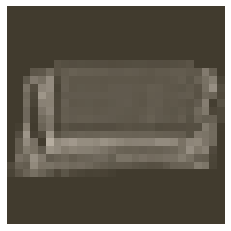

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
from torch import nn
import torch.nn.functional as F
from torch import optim

### Creating the network and initialising the optimizer and criterion

In [5]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1),
)

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

### training the network

In [6]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in (trainloader):
        
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        op = model(images)
        loss = criterion(op, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
    else:
        print(f'Training Loss: {running_loss/len(trainloader)}')

Training Loss: 0.5120795965194702
Training Loss: 0.37422508001327515
Training Loss: 0.3377319574356079
Training Loss: 0.3132983446121216
Training Loss: 0.2904132902622223
Training Loss: 0.2754577398300171
Training Loss: 0.2627037465572357
Training Loss: 0.24924153089523315
Training Loss: 0.23866789042949677
Training Loss: 0.22914110124111176


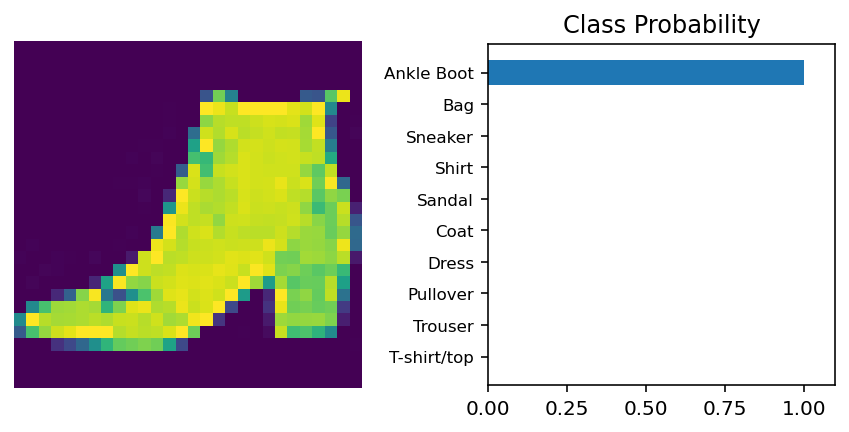

In [7]:
%config InlineBackend.figure_format = 'retina'

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0].view(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot and image and its probability
helper.view_classify(img, ps, version='Fashion')